Katie Bernard
Testing the MLP

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import preprocess_data

plt.show()
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)
%load_ext autoreload
%autoreload 2

def plot_cross_entropy_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Training mini-batch')
    plt.ylabel('Loss (cross-entropy)')
    plt.show()


### STL-10 Data

In [2]:
from load_stl10_dataset import load
images, labels = load()

Extracting ./data\stl10_binary.tar.gz...Done!
Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!


### Circle in a square (CIS) Data


In [8]:
val_size = 20

cis_train_path = os.path.join('data', 'cis', 'cis_train.dat')
cis_test_path = os.path.join('data', 'cis', 'cis_test.dat')

cis_train_all = np.loadtxt(cis_train_path, delimiter='\t')

# shuffle the data
s_inds = np.arange(len(cis_train_all))
rng = np.random.default_rng(0)
rng.shuffle(s_inds)

cis_train_all = cis_train_all[s_inds]

cis_train_x = cis_train_all[:, :2]
cis_train_y = cis_train_all[:, 2].astype(int)

cis_val_x = cis_train_x[:val_size]
cis_train_x = cis_train_x[val_size:]
cis_val_y = cis_train_y[:val_size]
cis_train_y = cis_train_y[val_size:]

cis_test_all = np.loadtxt(cis_test_path, delimiter='\t')
cis_test_x = cis_test_all[:, :2]
cis_test_y = cis_test_all[:, 2].astype(int)

print ('CIS Train data shape: ', cis_train_x.shape)
print ('CIS Train labels shape: ', cis_train_y.shape)
print ('CIS Validation data shape: ', cis_val_x.shape)
print ('CIS Validation labels shape: ', cis_val_y.shape)
print ('CIS Test data shape: ', cis_test_x.shape)
print ('CIS Test labels shape: ', cis_test_y.shape)

CIS Train data shape:  (80, 2)
CIS Train labels shape:  (80,)
CIS Validation data shape:  (20, 2)
CIS Validation labels shape:  (20,)
CIS Test data shape:  (10000, 2)
CIS Test labels shape:  (10000,)


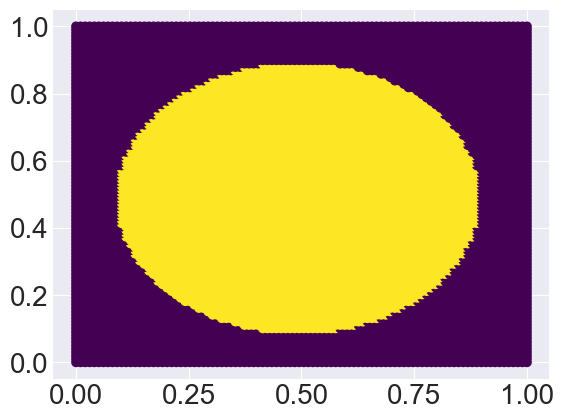

In [9]:
plt.scatter(cis_test_x[:,0], cis_test_x[:,1], c=cis_test_y, cmap='viridis')
plt.show()

### Testing and Debugging MLP

In [10]:
from mlp import MLP

In [11]:
num_inputs = 3
num_features = 6
num_hidden_units = 7
num_classes = 5

net = MLP(num_features, num_hidden_units, num_classes)

In [12]:
rng = np.random.default_rng(0)
test_x = rng.normal(loc=0, scale=100, size=(num_inputs, num_features))
test_y = rng.integers(low=0, high=num_classes-1, size=(num_inputs,))
print(f'Test input shape: {test_x.shape}')
print(f'Test class vector shape: {test_y.shape}')

Test input shape: (3, 6)
Test class vector shape: (3,)


In [13]:
net.initialize_wts(M=num_features, H=num_hidden_units, C=num_classes, std=0.01, r_seed=0)
print(f'y wt shape is {net.y_wts.shape}')
print(f'y bias shape is {net.y_b.shape}')
print(f'z wt shape is {net.z_wts.shape}')
print(f'z bias shape is {net.z_b.shape}')

print(f'1st few y wts are\n{net.y_wts[:,0]}')
print(f'y bias is\n{net.y_b}')
print(f'1st few z wts are\n{net.z_wts[:,0]}')
print(f'z bias is\n{net.z_b}')

y wt shape is (6, 7)
y bias shape is (7,)
z wt shape is (7, 5)
z bias shape is (5,)
1st few y wts are
[ 0.001  0.009 -0.012  0.014 -0.005  0.004]
y bias is
[ 0.013  0.008  0.003 -0.003  0.015  0.02   0.018]
1st few z wts are
[ 0.013 -0.013 -0.007  0.003 -0.022  0.018  0.02 ]
z bias is
[-0.013  0.006  0.006  0.013 -0.008]


In [14]:
test_y_pred = net.predict(test_x)
print(f'Predicted classes are {test_y_pred}')

Predicted classes are [3 0 3]


In [15]:
_,y_net_act_test,_,_,_ = net.forward(test_x, test_y)

correct_y_act = np.array([[0.   , 0.   , 0.433, 0.38 , 0.841, 0.217, 0.464],
       [0.522, 0.362, 0.201, 0.   , 0.   , 0.   , 2.697],
       [0.202, 1.955, 0.   , 0.   , 0.284, 0.   , 0.   ]])

print(f'y activation is\n{y_net_act_test}')

y activation is
[[0.    0.    0.433 0.38  0.841 0.217 0.464]
 [0.522 0.362 0.201 0.    0.    0.    2.697]
 [0.202 1.955 0.    0.    0.284 0.    0.   ]]


In [16]:
_,_,_,probs,_ = net.forward(test_x, test_y)

correct_probs = np.array([[0.196, 0.2  , 0.201, 0.207, 0.196],
       [0.208, 0.202, 0.196, 0.201, 0.192],
       [0.192, 0.204, 0.203, 0.206, 0.194]])

print(f'z activation (class probabilities) is\n{probs}')
print(f'The sums for each row are {np.sum(probs, axis=1)}.')

z activation (class probabilities) is
[[0.196 0.2   0.201 0.207 0.196]
 [0.208 0.202 0.196 0.201 0.192]
 [0.192 0.204 0.203 0.206 0.194]]
The sums for each row are [1. 1. 1.].


In [17]:
y_in, y_act ,z_in, z_act, loss = net.forward(test_x, test_y)
correct_loss = 1.6067

print(f'Average loss is\n{loss:.4f}')

Average loss is
1.6067


In [18]:
y_in, y_act ,z_in, z_act, loss = net.forward(test_x, test_y, reg=1000)
correct_loss = 4.8772

print(f'Regularized average loss is\n{loss:.4f}')

Regularized average loss is
4.8772


In [19]:
y_in, y_act ,z_in, z_act, loss = net.forward(test_x, test_y, reg=0.5)
grads = net.backward(test_x, test_y, y_in, y_act ,z_in, z_act, reg=0.5)

print('Gradient for y_wts is\n', grads[0])
print('Gradient for z_wts is\n', grads[2])
print('Gradient for z_b is\n', grads[3])

Gradient for y_wts is
 [[ 0.064  0.18   0.126  0.017  0.267 -0.068 -0.139]
 [-0.023 -0.148  0.047 -0.021 -0.071  0.061  0.041]
 [ 0.085  0.367  0.043  0.084  0.53  -0.349 -0.392]
 [ 0.095  0.381 -0.081  0.018  0.129 -0.062 -0.014]
 [ 0.051  0.225 -0.138 -0.072 -0.316  0.299  0.387]
 [ 0.016  0.048  0.059  0.052  0.275 -0.206 -0.235]]
Gradient for z_wts is
 [[ 0.056 -0.191  0.042  0.049  0.05 ]
 [ 0.144 -0.613  0.158  0.162  0.144]
 [-0.105 -0.027  0.036  0.052  0.039]
 [-0.1    0.024  0.033  0.033  0.028]
 [-0.218 -0.019  0.079  0.082  0.07 ]
 [-0.049  0.008  0.011  0.02   0.014]
 [ 0.073 -0.685  0.204  0.211  0.198]]
Gradient for z_b is
 [-0.135 -0.465  0.2    0.205  0.194]


The correct gradients are:

```
Your gradient for y_wts is
 [[ 0.064  0.18   0.126  0.017  0.267 -0.068 -0.139]
 [-0.023 -0.148  0.047 -0.021 -0.071  0.061  0.041]
 [ 0.085  0.367  0.043  0.084  0.53  -0.349 -0.392]
 [ 0.095  0.381 -0.081  0.018  0.129 -0.062 -0.014]
 [ 0.051  0.225 -0.138 -0.072 -0.316  0.299  0.387]
 [ 0.016  0.048  0.059  0.052  0.275 -0.206 -0.235]]
Your gradient for y_b is
 [-0.001 -0.004  0.002  0.001  0.006 -0.006 -0.007]
Your gradient for z_wts is
 [[ 0.056 -0.191  0.042  0.049  0.05 ]
 [ 0.144 -0.613  0.158  0.162  0.144]
 [-0.105 -0.027  0.036  0.052  0.039]
 [-0.1    0.024  0.033  0.033  0.028]
 [-0.218 -0.019  0.079  0.082  0.07 ]
 [-0.049  0.008  0.011  0.02   0.014]
 [ 0.073 -0.685  0.204  0.211  0.198]]
Your gradient for z_b is
 [-0.135 -0.465  0.2    0.205  0.194]
```

Epoch 0/20: Loss = 2.1422, Train Accuracy = 0.3333, Validation Accuracy = 0.3333
Epoch 5/20: Loss = 0.1985, Train Accuracy = 0.6667, Validation Accuracy = 0.6667
Epoch 10/20: Loss = 0.6424, Train Accuracy = 0.6667, Validation Accuracy = 0.6667
Epoch 15/20: Loss = 0.6025, Train Accuracy = 0.6667, Validation Accuracy = 0.6667
Training complete.

Lengths of each output list:
len(loss_hist)=20, len(acc_train)=20, len(acc_valid)=20
Each should be 20.


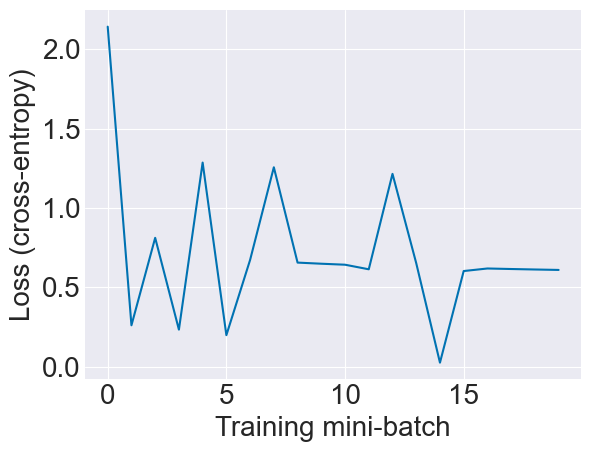

In [20]:
net = MLP(num_features, num_hidden_units, num_classes)
loss_hist, acc_train, acc_valid = net.fit(test_x, test_y, test_x, test_y,
                                          reg=0,
                                          print_every=5,
                                          lr=0.001,
                                          mini_batch_sz=3,
                                          n_epochs=20,
                                          r_seed=0)

print('\nLengths of each output list:')
print(f'{len(loss_hist)=}, {len(acc_train)=}, {len(acc_valid)=}')
print('Each should be 20.')

plot_cross_entropy_loss(loss_hist)

Epoch 0/10: Loss = 0.0034, Train Accuracy = 0.3333, Validation Accuracy = 0.3333
Epoch 2/10: Loss = 3.5341, Train Accuracy = 0.6667, Validation Accuracy = 0.6667
Epoch 4/10: Loss = 2.4426, Train Accuracy = 0.6667, Validation Accuracy = 0.6667
Epoch 6/10: Loss = 0.0711, Train Accuracy = 0.6667, Validation Accuracy = 0.6667
Epoch 8/10: Loss = 0.5410, Train Accuracy = 1.0000, Validation Accuracy = 1.0000
Training complete.

Lengths of each output list:
len(loss_hist)=30, len(acc_train)=10, len(acc_valid)=10
The lengths should be 30, 10, 10.


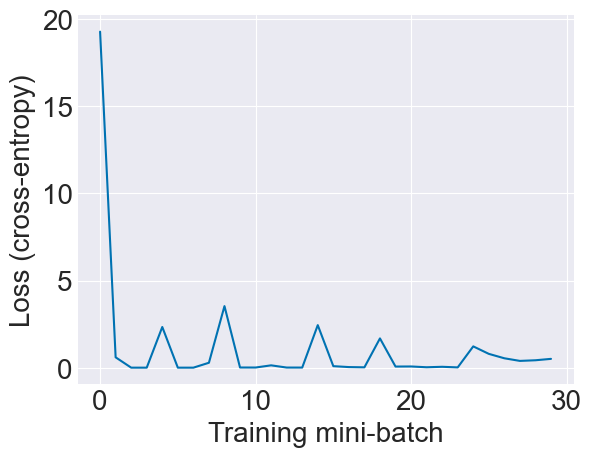

In [21]:
net = MLP(num_features, num_hidden_units, num_classes)
loss_hist, acc_train, acc_valid = net.fit(test_x, test_y, test_x, test_y,
                                          reg=0,
                                          print_every=2,
                                          lr=0.001,
                                          mini_batch_sz=1,
                                          n_epochs=10,
                                          r_seed=2)

print('\nLengths of each output list:')
print(f'{len(loss_hist)=}, {len(acc_train)=}, {len(acc_valid)=}')
print('The lengths should be 30, 10, 10.')

plot_cross_entropy_loss(loss_hist)

### MLP on Circle in Square dataset

Epoch 0/600: Loss = 0.6878, Train Accuracy = 0.5000, Validation Accuracy = 0.5000
Epoch 100/600: Loss = 0.6667, Train Accuracy = 0.5375, Validation Accuracy = 0.4500
Epoch 200/600: Loss = 0.5888, Train Accuracy = 0.6250, Validation Accuracy = 0.5000
Epoch 300/600: Loss = 0.4744, Train Accuracy = 0.8375, Validation Accuracy = 0.7500
Epoch 400/600: Loss = 0.2558, Train Accuracy = 0.9750, Validation Accuracy = 0.9000
Epoch 500/600: Loss = 0.2991, Train Accuracy = 0.9125, Validation Accuracy = 0.7000
Training complete.


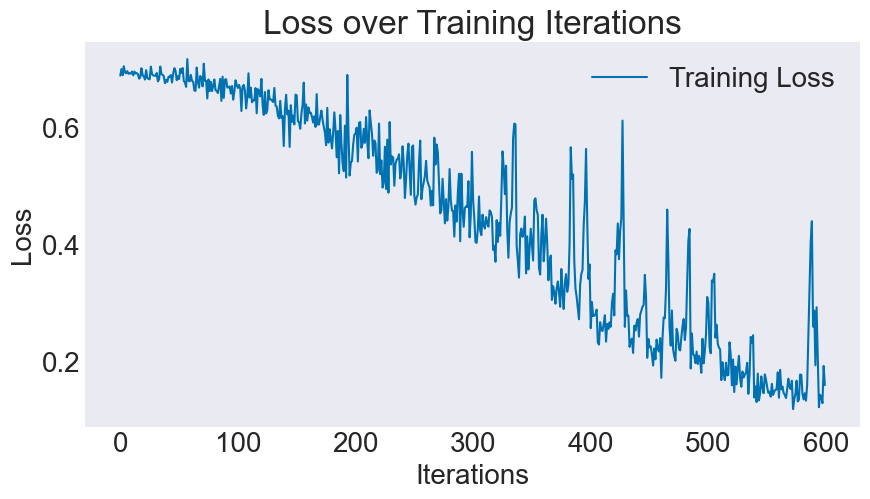

In [22]:
num_input_units = cis_train_x.shape[1]  # num features in input data
num_hidden_units = 50
num_output_units = len(np.unique(cis_train_y))  # num unique classes in labels

CIS_MLP = MLP(num_input_units, num_hidden_units, num_output_units)

#train 
loss_history, train_acc_history, validation_acc_history = CIS_MLP.fit(cis_train_x, cis_train_y, cis_val_x, cis_val_y, n_epochs=600, lr=0.5, mini_batch_sz=80, reg=0,
            r_seed=0, verbose=2, print_every=100)

plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.title('Loss over Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

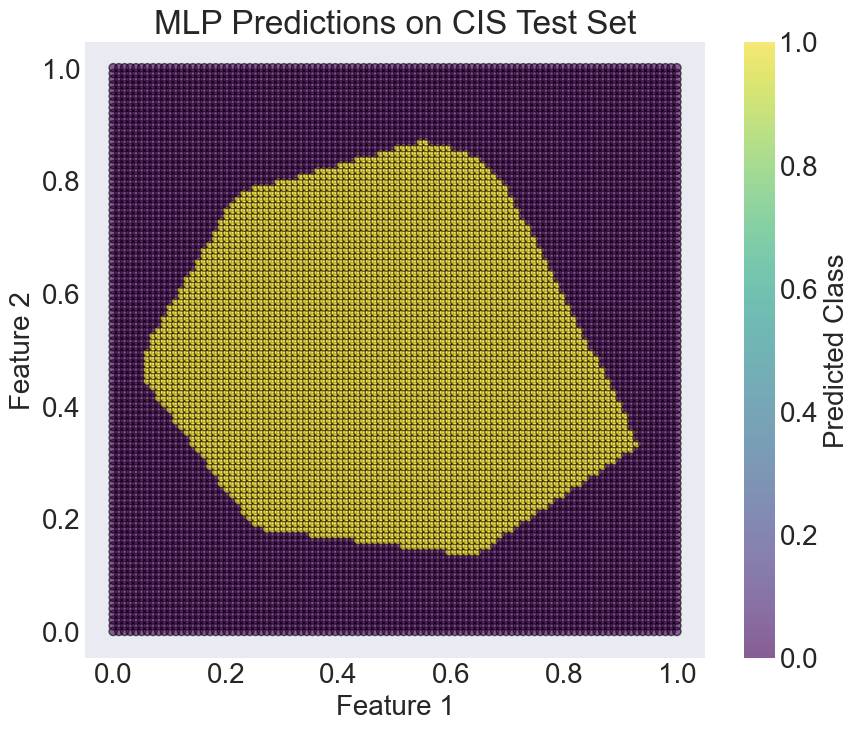

In [23]:
#pred for the CIS test set
test_predictions = CIS_MLP.predict(cis_test_x)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(cis_test_x[:, 0], cis_test_x[:, 1], c=test_predictions, cmap='viridis', alpha=0.6, edgecolors='k')
plt.colorbar(scatter, label='Predicted Class')
plt.title('MLP Predictions on CIS Test Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.grid()
plt.show()

The circle is a little lopsided and has a sharp corner on the left side. Generally, the object in the middle is fairly circular so I would say that the MLP is doing a decent job but could be improved. 

Training with 10 hidden units...
Training with 50 hidden units...
Training with 100 hidden units...
Training with 200 hidden units...
Training with 100 epochs...
Training with 300 epochs...
Training with 600 epochs...
Training with 1000 epochs...


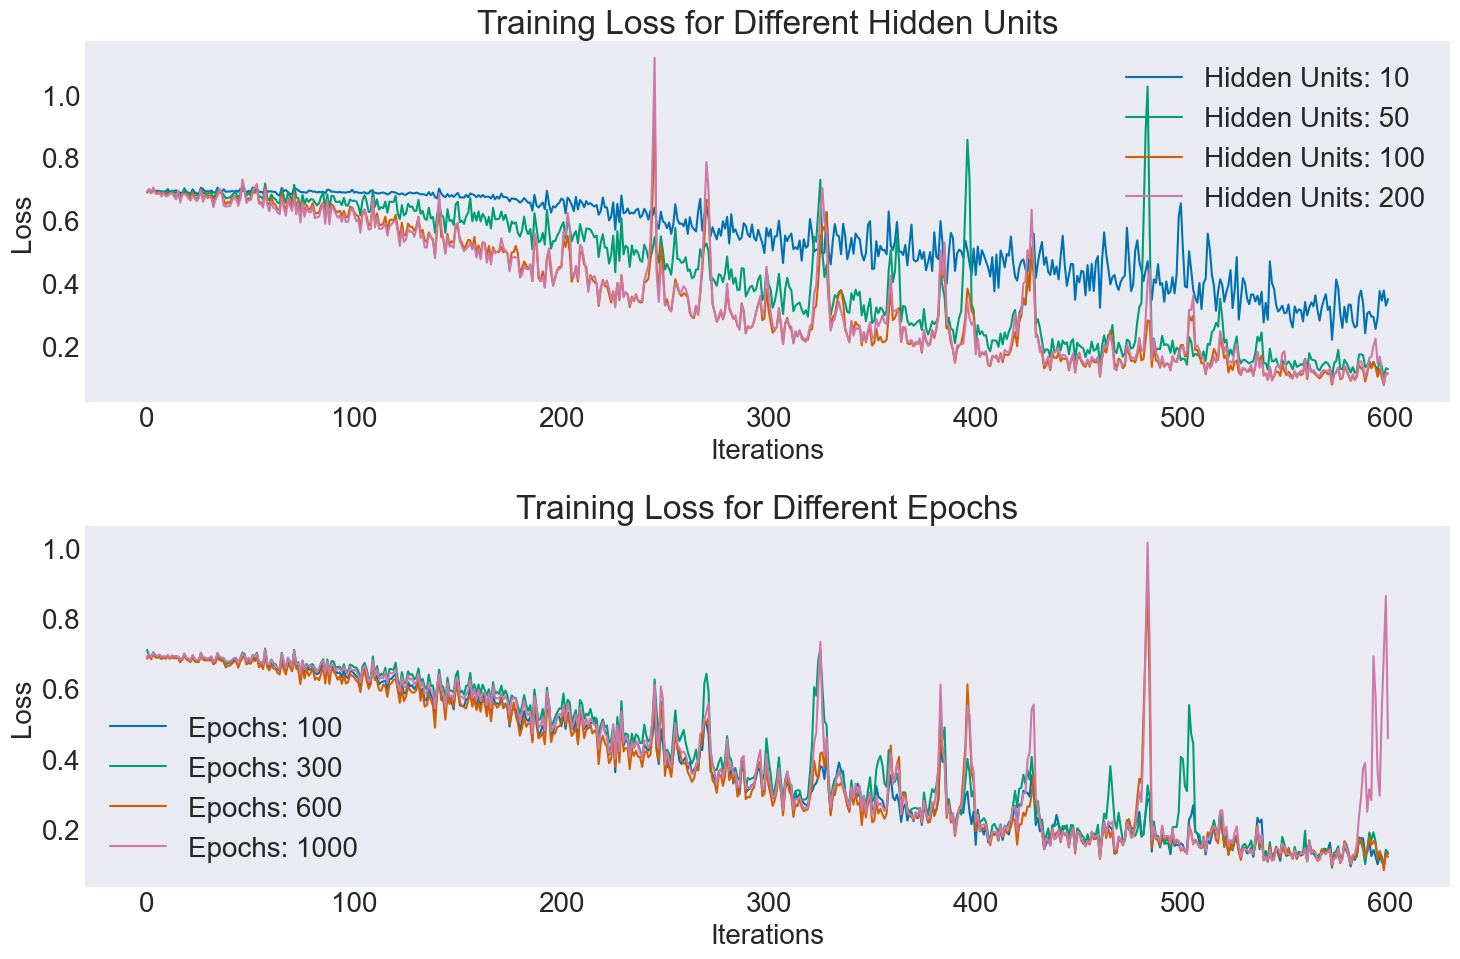

Training with batch size: 16...
Training with batch size: 32...
Training with batch size: 64...
Training with batch size: 128...


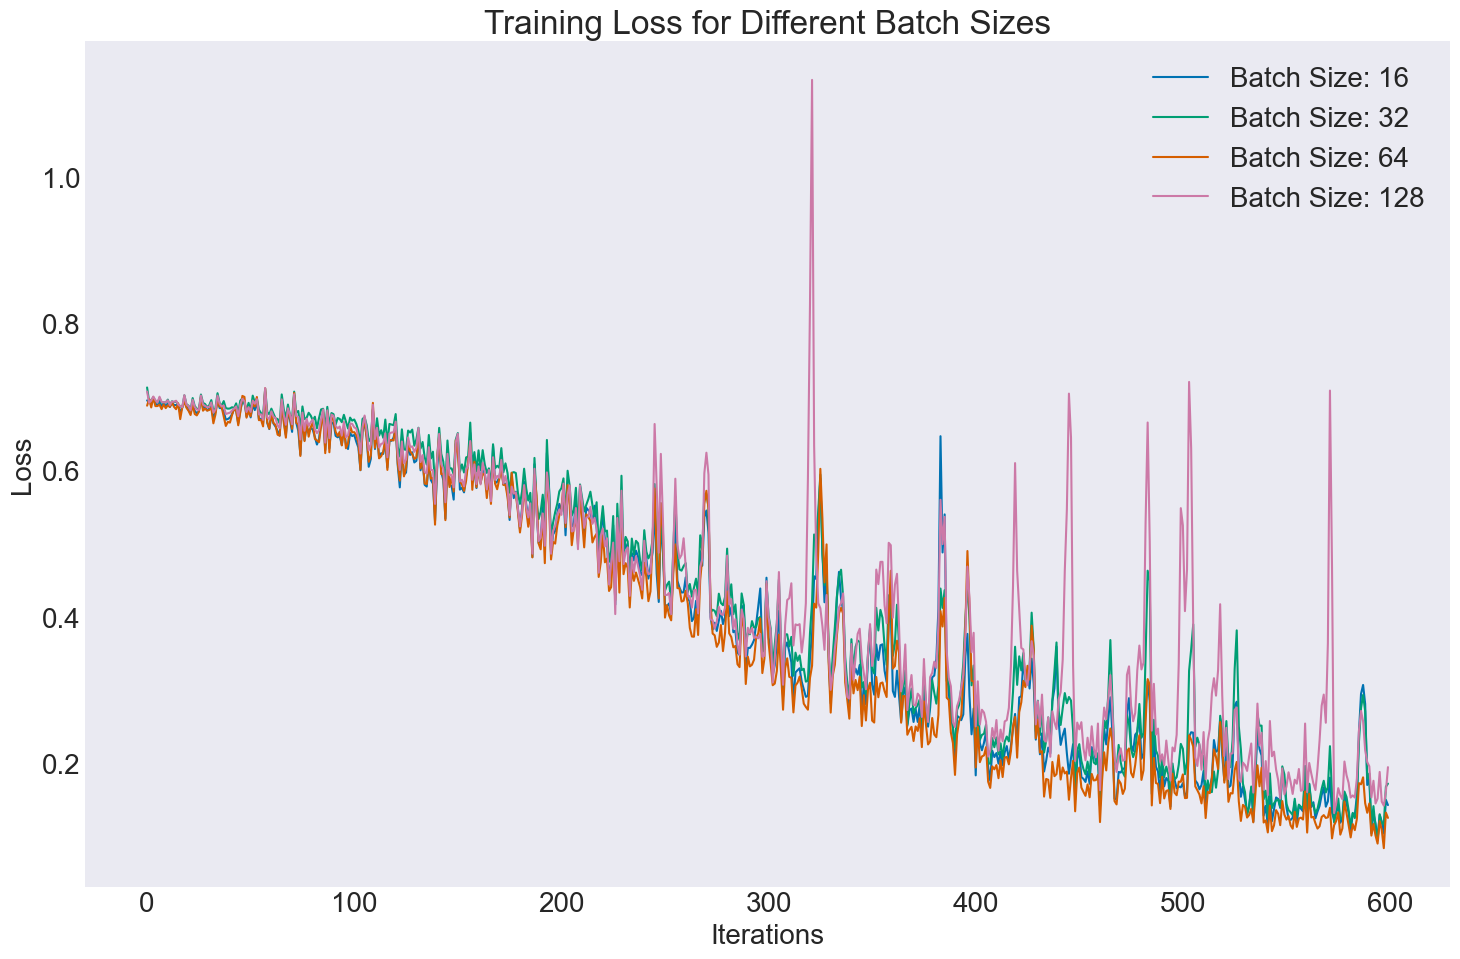

In [24]:
def train_mlp(hidden_units, epochs, batch_size):
    num_input_units = cis_train_x.shape[1]
    num_output_units = len(np.unique(cis_train_y))

    mlp = MLP(num_input_units, hidden_units, num_output_units)

    loss_history, train_acc_history, validation_acc_history = mlp.fit(cis_train_x, cis_train_y, cis_val_x, cis_val_y, n_epochs=600, lr=0.5, mini_batch_sz=80, reg=0,
            r_seed=0, verbose=0)

    return loss_history, train_acc_history, validation_acc_history


## test num of hidden units
hidden_units_list = [10, 50, 100, 200]
loss_results = []

for hidden_units in hidden_units_list:
    print(f"Training with {hidden_units} hidden units...")
    loss_history, _, val_acc = train_mlp(hidden_units, epochs=600, batch_size=80)
    loss_results.append(loss_history)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
for i, loss_history in enumerate(loss_results):
    plt.plot(loss_history, label=f'Hidden Units: {hidden_units_list[i]}')
plt.title('Training Loss for Different Hidden Units')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()

## test num of epochs
epochs_list = [100, 300, 600, 1000]
loss_results = []

for epochs in epochs_list:
    print(f"Training with {epochs} epochs...")
    loss_history, _, val_acc = train_mlp(hidden_units=50, epochs=epochs, batch_size=80)
    loss_results.append(loss_history)

plt.subplot(2, 1, 2)
for i, loss_history in enumerate(loss_results):
    plt.plot(loss_history, label=f'Epochs: {epochs_list[i]}')
plt.title('Training Loss for Different Epochs')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## testing batch size
batch_sizes = [16, 32, 64, 128]
loss_results = []
val_acc_results = []

for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}...")
    loss_history, _, val_acc = train_mlp(hidden_units=50, epochs=600, batch_size=batch_size)
    loss_results.append(loss_history)

plt.figure(figsize=(15, 10))
for i, loss_history in enumerate(loss_results):
    plt.plot(loss_history, label=f'Batch Size: {batch_sizes[i]}')
plt.title('Training Loss for Different Batch Sizes')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Generally, it seems that there is a significant difference based on the number of hidden units. A greater number of hidden units resulted in a lower loss. A greater number of epochs and a larger batch size also resulted in lower loss - although not as significant as a drop. 

### MLP on STL-10 dataset

Found cached numpy arrays the images and labels. Loading them...
Images are: (5000, 32, 32, 3)
Labels are: (5000,)
Epoch 0/100: Loss = 3.1803, Train Accuracy = 0.2323, Validation Accuracy = 0.1930
Training complete.


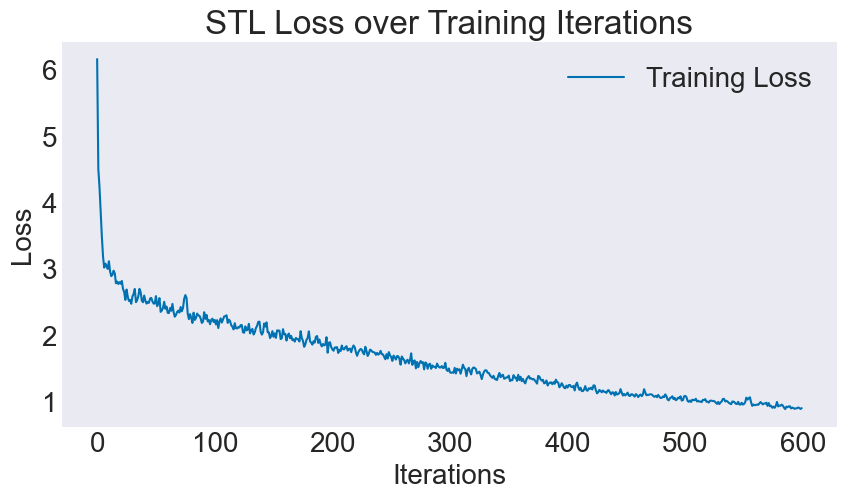

In [25]:
stl_x_train, stl_y_train, stl_x_test, stl_y_test, stl_x_val, stl_y_val, stl_x_dev, stl_y_dev = preprocess_data.load_stl10(n_train_samps=3000, n_test_samps=750, n_valid_samps=1000, n_dev_samps=250)

num_input_units = stl_x_train.shape[1]
num_hidden_units = 50
num_output_units = len(np.unique(stl_y_train))

STL_MLP = MLP(num_input_units, num_hidden_units, num_output_units)

stl_loss_history, stl_train_acc_history, stl_validation_acc_history = STL_MLP.fit(stl_x_train, stl_y_train, stl_x_val, stl_y_val, n_epochs=100, lr=0.1, mini_batch_sz=500, reg=0.001,
            r_seed=0, verbose=2, print_every=100)

plt.figure(figsize=(10, 5))
plt.plot(stl_loss_history, label='Training Loss')
plt.title('STL Loss over Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

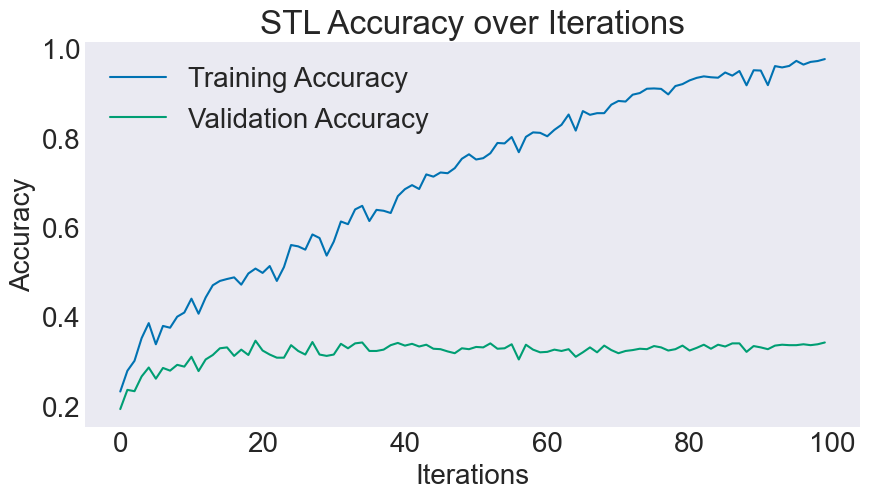

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(stl_train_acc_history, label='Training Accuracy')
plt.plot(stl_validation_acc_history, label='Validation Accuracy')
plt.title('STL Accuracy over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

The quality of the hyperparameters is good because there is no dipping down of validation accuracy and no plateau at 1 (or 100%) for the training accuracy.  

### Random search to optimize hyperparameters

In [27]:
learning_rate_range = (1e-4, 1e-1)
regularization_range = (1e-5, 1)
hidden_units_range = (10, 200)
batch_size_range = (16, 512)
epochs_range = (1, 150)

best_params = {}
best_val_accuracy = 0

T = 50
rng = np.random.default_rng()
r_seed = 0
for i in range(T):
    lr = rng.uniform(*learning_rate_range)
    reg = rng.uniform(*regularization_range)
    hidden_units = rng.integers(*hidden_units_range)
    batch_size = rng.integers(*batch_size_range)
    n_epochs = rng.integers(*epochs_range)
    
    mlp = MLP(num_input_units=stl_x_train.shape[1], num_hidden_units=hidden_units, num_output_units=10)
    loss_history, train_acc_history, validation_acc_history = mlp.fit(stl_x_train, stl_y_train, stl_x_val, stl_y_val, n_epochs=n_epochs, lr=lr, mini_batch_sz=batch_size, reg=reg,
            r_seed=r_seed, verbose=0)   
    
    train_preds = mlp.predict(stl_x_train)
    train_accuracy = mlp.accuracy(stl_y_train, train_preds)
    val_preds = mlp.predict(stl_x_val)
    val_accuracy = mlp.accuracy(stl_y_val, val_preds)
    
    
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_params = {
            'learning_rate': lr,
            'regularization': reg,
            'hidden_units': hidden_units,
            'batch_size': batch_size,
            'epochs': n_epochs,
            'random_seed': r_seed
        }
        print(f"Random Search - seed: {r_seed}, lr: {lr}, reg: {reg}, hidden_units: {hidden_units}, batch_size: {batch_size}, epochs: {n_epochs}, val_acc: {val_accuracy:.4f}, train_acc: {train_accuracy}")
    r_seed = r_seed+1


Random Search - seed: 0, lr: 0.012212374673681255, reg: 0.9313922406646991, hidden_units: 84, batch_size: 43, epochs: 146, val_acc: 0.2440, train_acc: 0.2703333333333333
Random Search - seed: 2, lr: 0.08122402469283918, reg: 0.008422443121882773, hidden_units: 93, batch_size: 287, epochs: 54, val_acc: 0.3740, train_acc: 0.9863333333333333
Random Search - seed: 16, lr: 0.06170564557405908, reg: 0.062035474266951704, hidden_units: 14, batch_size: 425, epochs: 79, val_acc: 0.3760, train_acc: 0.551
Random Search - seed: 36, lr: 0.008902093879686204, reg: 0.25428824911062775, hidden_units: 191, batch_size: 245, epochs: 120, val_acc: 0.3860, train_acc: 0.42866666666666664
Random Search - seed: 39, lr: 0.09969865981323589, reg: 0.04927454979422536, hidden_units: 146, batch_size: 435, epochs: 134, val_acc: 0.4200, train_acc: 0.8776666666666667
Random Search - seed: 46, lr: 0.059747982845906655, reg: 0.04747920396395143, hidden_units: 136, batch_size: 301, epochs: 96, val_acc: 0.4230, train_acc

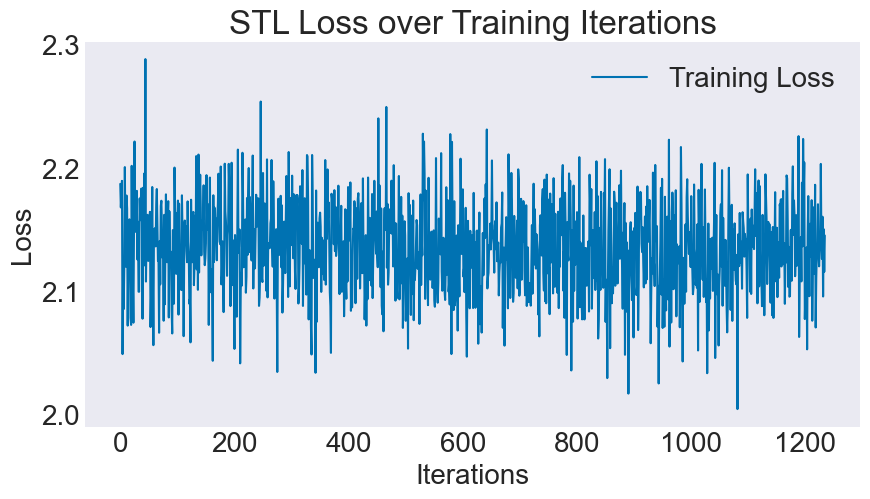

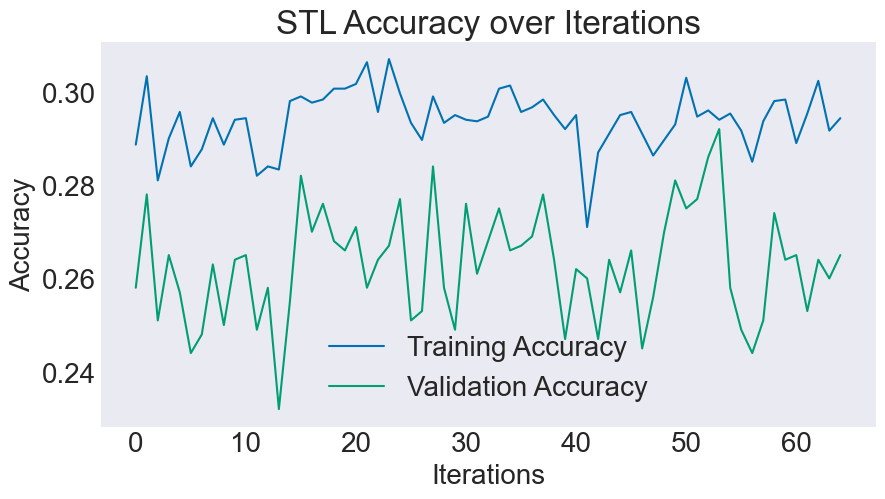

In [28]:
bestNet = MLP(num_input_units=stl_x_train.shape[1], num_hidden_units=hidden_units, num_output_units=10)
loss_history, train_acc_history, validation_acc_history = mlp.fit(stl_x_train, stl_y_train, stl_x_val, stl_y_val, n_epochs=n_epochs, lr=lr, mini_batch_sz=batch_size, reg=reg,
        r_seed=r_seed, verbose=0)   
    
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.title('STL Loss over Training Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(validation_acc_history, label='Validation Accuracy')
plt.title('STL Accuracy over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [29]:
best_y_wts = bestNet.get_y_wts()
best_y_wts = best_y_wts.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)

In [30]:
def plot_weights(wts, maxRows=25, verbose=0):
    grid_sz = int(maxRows)
    grid_sz = np.minimum(grid_sz, int(np.sqrt(len(wts))))

    if verbose > 0:
        print(f'Showing {grid_sz} rows')

    plt.figure(figsize=(20,20))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.show()

Showing 6 rows


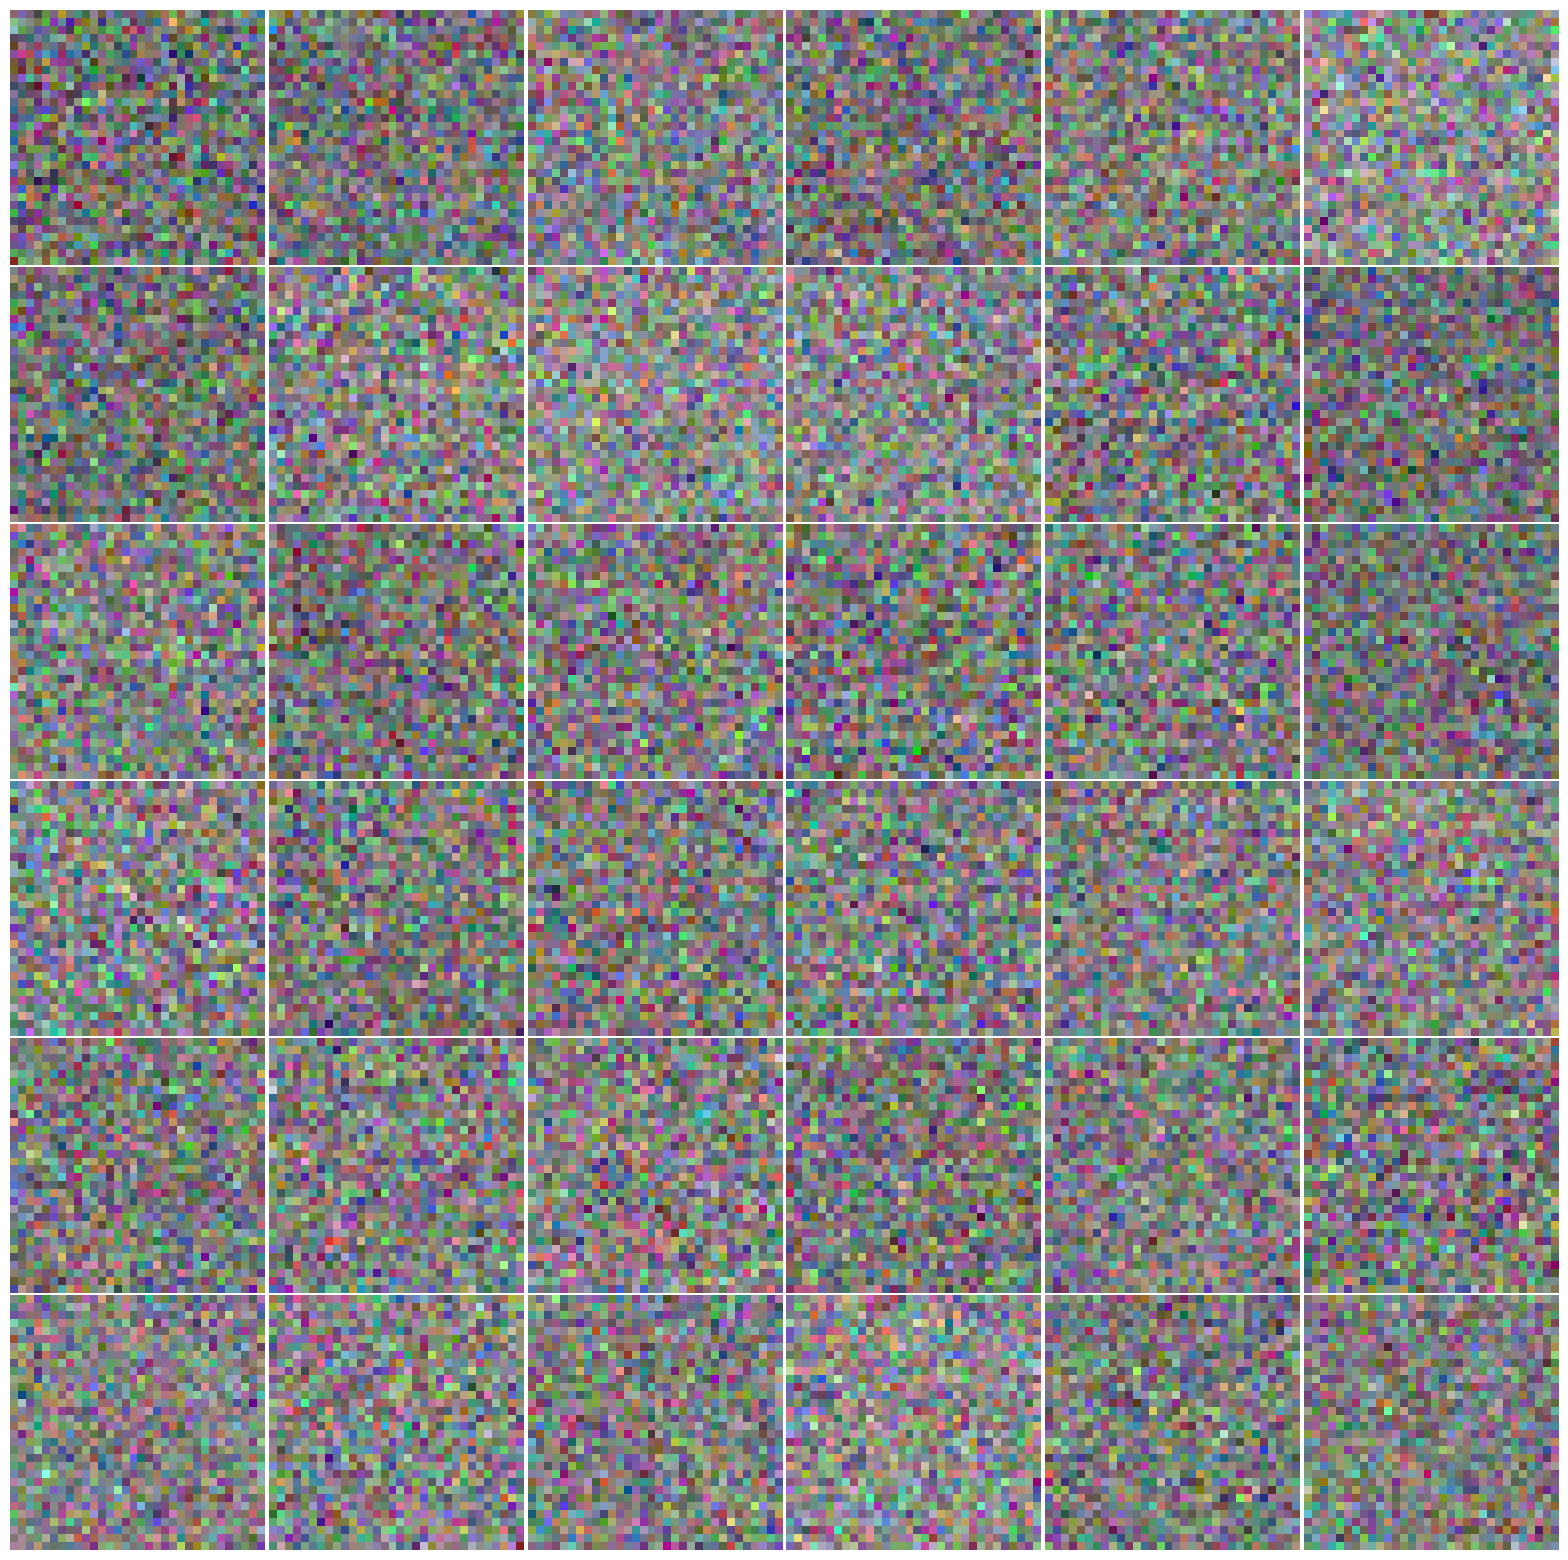

In [31]:
plot_weights(best_y_wts, verbose=1)

## A better Grid Search

In [32]:
from softmax_layer import SoftmaxLayer

In [33]:
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.load_stl10(n_train_samps=3000, n_test_samps=750, n_valid_samps=1000, n_dev_samps=250)

def create_range(low, high, step):
    return np.arange(low, high, step)

def grid_search(x_train, y_train, x_val, y_val, learning_rate_low, learning_rate_high, learning_rate_step,
                regularization_low, regularization_high, regularization_step,
                batch_size_low, batch_size_high, batch_size_step,
                n_epochs, zoom_levels=3):
    best_params = {}
    best_val_accuracy = 0
    
    for zoom in range(zoom_levels):
        print(f"Zoom Level: {zoom + 1}")

        learning_rates = create_range(learning_rate_low, learning_rate_high, learning_rate_step)
        regularizations = create_range(regularization_low, regularization_high, regularization_step)
        batch_sizes = create_range(batch_size_low, batch_size_high + 1, batch_size_step)
        
        r_seed = 0
        for lr in learning_rates:
            for reg in regularizations:
                for batch_size in batch_sizes:
                    softmaxNet = SoftmaxLayer(10)
                    loss_history = softmaxNet.fit(x_train, y_train, r_seed=r_seed,
                                                  n_epochs=n_epochs,
                                                  lr=lr,
                                                  mini_batch_sz=batch_size,
                                                  verbose=0)
                    train_preds = softmaxNet.predict(x_train)
                    train_accuracy = softmaxNet.accuracy(y_train, train_preds)
                    val_preds = softmaxNet.predict(x_val)
                    val_accuracy = softmaxNet.accuracy(y_val, val_preds)
                    
                    if val_accuracy > best_val_accuracy:
                        best_val_accuracy = val_accuracy
                        best_params = {
                            'learning_rate': lr,
                            'regularization': reg,
                            'batch_size': batch_size,
                            'random_seed': r_seed
                        }
                        print(f"Zoom Level {zoom + 1} - Seed: {r_seed}, lr: {lr}, reg: {reg}, batch_size: {batch_size}, val_acc: {val_accuracy}, train_acc: {train_accuracy}")
                    
                    r_seed += 1
        
        # Update the hyperparameter ranges for the next zoom level
        learning_rate_low = best_params['learning_rate'] * 0.5
        learning_rate_high = best_params['learning_rate'] * 2
        learning_rate_step = best_params['learning_rate'] * 0.25
        
        regularization_low = best_params['regularization'] * 0.5
        regularization_high = best_params['regularization'] * 2
        regularization_step = best_params['regularization'] * 0.25
        
        batch_size_low = max(1, best_params['batch_size'] // 2)
        batch_size_high = min(512, best_params['batch_size'] * 2)
        batch_size_step = max(1, best_params['batch_size'] // 2)
    
    print("\nBest Hyperparameters:")
    print(f"Seed: {best_params['random_seed']}")
    print(f"Learning Rate: {best_params['learning_rate']}")
    print(f"Regularization: {best_params['regularization']}")
    print(f"Batch Size: {best_params['batch_size']}")
    print(f"Validation Accuracy: {best_val_accuracy}")

learning_rate_low = 1e-4
learning_rate_high = 1e-1
learning_rate_step = 2.5e-2

regularization_low = 1e-5
regularization_high = 1
regularization_step = 2.5e-1

batch_size_low = 16
batch_size_high = 512
batch_size_step = 64

n_epochs = 75

grid_search(x_train, y_train, x_val, y_val,
            learning_rate_low, learning_rate_high, learning_rate_step,
            regularization_low, regularization_high, regularization_step,
            batch_size_low, batch_size_high, batch_size_step,
            n_epochs, zoom_levels=3)


Found cached numpy arrays the images and labels. Loading them...
Images are: (5000, 32, 32, 3)
Labels are: (5000,)
Zoom Level: 1
Zoom Level 1 - Seed: 0, lr: 0.0001, reg: 1e-05, batch_size: 16, val_acc: 0.354, train_acc: 0.485
Zoom Level 1 - Seed: 8, lr: 0.0001, reg: 0.25001, batch_size: 16, val_acc: 0.357, train_acc: 0.483
Zoom Level: 2
Zoom Level 2 - Seed: 8, lr: 5e-05, reg: 0.25000999999999995, batch_size: 8, val_acc: 0.362, train_acc: 0.4856666666666667
Zoom Level 2 - Seed: 70, lr: 0.00010000000000000002, reg: 0.4375175, batch_size: 24, val_acc: 0.366, train_acc: 0.4533333333333333
Zoom Level: 3

Best Hyperparameters:
Seed: 70
Learning Rate: 0.00010000000000000002
Regularization: 0.4375175
Batch Size: 24
Validation Accuracy: 0.366


Epoch 0/50: Loss = 248.1656, Train Accuracy = 0.1360, Validation Accuracy = 0.1370
Training complete.
Epoch 0/50: Loss = 34.6056, Train Accuracy = 0.4277, Validation Accuracy = 0.3330
Epoch 1/50: Loss = 6.2933, Train Accuracy = 0.4540, Validation Accuracy = 0.3530
Epoch 2/50: Loss = 3.2664, Train Accuracy = 0.4283, Validation Accuracy = 0.3290
Epoch 3/50: Loss = 2.4301, Train Accuracy = 0.4177, Validation Accuracy = 0.3320
Epoch 4/50: Loss = 2.0122, Train Accuracy = 0.4420, Validation Accuracy = 0.3510
Epoch 5/50: Loss = 2.0993, Train Accuracy = 0.4350, Validation Accuracy = 0.3520
Epoch 6/50: Loss = 1.2516, Train Accuracy = 0.4433, Validation Accuracy = 0.3640
Epoch 7/50: Loss = 2.3533, Train Accuracy = 0.4763, Validation Accuracy = 0.3810
Epoch 8/50: Loss = 3.2311, Train Accuracy = 0.4187, Validation Accuracy = 0.3330
Epoch 9/50: Loss = 2.2164, Train Accuracy = 0.4377, Validation Accuracy = 0.3730
Epoch 10/50: Loss = 1.4558, Train Accuracy = 0.4430, Validation Accuracy = 0.3590
Epoch

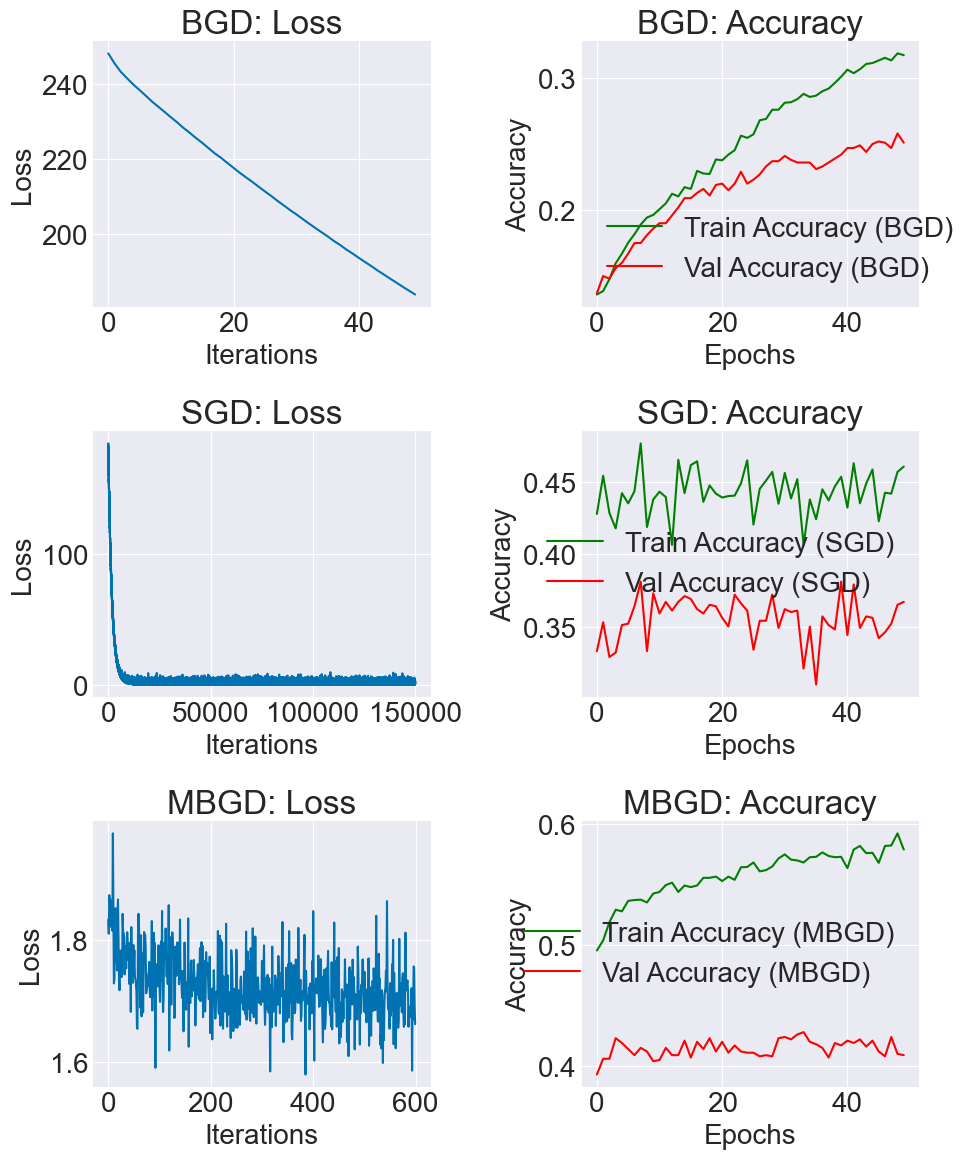

In [34]:
#Exploring the effects of batch gradient descent, stochastic gradient descent, and mini-batch gradient descent. 

num_input_units = stl_x_train.shape[1] 
num_hidden_units = 124
num_output_units = len(np.unique(stl_y_train))
STL_MLP = MLP(num_input_units, num_hidden_units, num_output_units)

best_epochs = 50
best_lr = 0.022640025876095093
best_reg = 0.12676078653277084
best_batch_size = 255


loss_hist_bgd, train_acc_hist_bgd, val_acc_hist_bgd = STL_MLP.fit(stl_x_train, stl_y_train, stl_x_val, stl_y_val, n_epochs=best_epochs, lr=best_lr, mini_batch_sz=stl_x_train.shape[0], reg=best_reg,
            r_seed=0, verbose=2, print_every=100)
loss_hist_sgd, train_acc_hist_sgd, val_acc_hist_sgd = STL_MLP.fit(stl_x_train, stl_y_train, stl_x_val, stl_y_val, n_epochs=best_epochs, lr=0.1*best_lr, mini_batch_sz=1, reg=best_reg,
            r_seed=0, verbose=2, print_every=1)
loss_hist_mbgd, train_acc_hist_mbgd, val_acc_hist_mbgd = STL_MLP.fit(stl_x_train, stl_y_train, stl_x_val, stl_y_val, n_epochs=best_epochs, lr=best_lr, mini_batch_sz=best_batch_size, reg=best_reg,
            r_seed=0, verbose=2, print_every=100)

# 3x2 plot
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# BGD plots
axs[0, 0].plot(loss_hist_bgd, label='Loss (BGD)')
axs[0, 0].set_title('BGD: Loss')
axs[0, 0].set_xlabel('Iterations')
axs[0, 0].set_ylabel('Loss')

axs[0, 1].plot(train_acc_hist_bgd, label='Train Accuracy (BGD)', color='g')
axs[0, 1].plot(val_acc_hist_bgd, label='Val Accuracy (BGD)', color='r')
axs[0, 1].set_title('BGD: Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# SGD plots
axs[1, 0].plot(loss_hist_sgd, label='Loss (SGD)')
axs[1, 0].set_title('SGD: Loss')
axs[1, 0].set_xlabel('Iterations')
axs[1, 0].set_ylabel('Loss')

axs[1, 1].plot(train_acc_hist_sgd, label='Train Accuracy (SGD)', color='g')
axs[1, 1].plot(val_acc_hist_sgd, label='Val Accuracy (SGD)', color='r')
axs[1, 1].set_title('SGD: Accuracy')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

# MBGD plots
axs[2, 0].plot(loss_hist_mbgd, label='Loss (MBGD)')
axs[2, 0].set_title('MBGD: Loss')
axs[2, 0].set_xlabel('Iterations')
axs[2, 0].set_ylabel('Loss')

axs[2, 1].plot(train_acc_hist_mbgd, label='Train Accuracy (MBGD)', color='g')
axs[2, 1].plot(val_acc_hist_mbgd, label='Val Accuracy (MBGD)', color='r')
axs[2, 1].set_title('MBGD: Accuracy')
axs[2, 1].set_xlabel('Epochs')
axs[2, 1].set_ylabel('Accuracy')
axs[2, 1].legend()

plt.tight_layout()
plt.show()
